<a href="https://colab.research.google.com/github/rahulvudari/CatsVsDogs-Classifier-TensorFlow/blob/master/DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import os, zipfile
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image


In [3]:
!pip install kaggle

In [4]:
!mkdir .kaggle
token = {"username":"username","key":"key"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)


In [5]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d chetankv/dogs-cats-images

- path is now set to: {/content}
ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31            196  
shivan118/healthcare-analytics                         Healthcare Analytics                                2MB  2020-09-13 17:40:05            127  
Cornell-University/arxiv                               arXiv Dataset                                     885MB  2020-09-14 16:54:47           2753  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          63MB  2020-09-02 13:46:38            106  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets

In [8]:


local_zip = '/content/{/content}/datasets/chetankv/dogs-cats-images/dogs-cats-images.zip'

zipref = zipfile.ZipFile(local_zip,'r')
zipref.extractall('/tmp')
zipref.close()

In [9]:
base_dir = '/tmp/dog vs cat/dataset'
train_dir = os.path.join(base_dir,'training_set')
test_dir = os.path.join(base_dir,'test_set')


In [10]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 20,
                                               target_size = (150,150),
                                               class_mode='binary')

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 20,
                                               target_size = (150,150),
                                               class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')

last_ouptut = last_layer.output

--2020-09-16 15:29:53--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   332MB/s    in 0.3s    

2020-09-16 15:29:53 (332 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0              

In [22]:


x = tf.keras.layers.Flatten()(last_ouptut)

x = tf.keras.layers.Dense(1024,activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(pre_trained_model.input,x)

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [25]:
history = model.fit(
      train_data,
      steps_per_epoch=100,  
      epochs=20,
      verbose=1,
      validation_data = valid_data,
      validation_steps=8)

Epoch 1/20
100/100 [==============================] - 101s 1s/step - loss: 0.2022 - accuracy: 0.9255 - val_loss: 0.0937 - val_accuracy: 0.9563
Epoch 2/20
100/100 [==============================] - 102s 1s/step - loss: 0.1892 - accuracy: 0.9315 - val_loss: 0.0521 - val_accuracy: 0.9750
Epoch 3/20
100/100 [==============================] - 102s 1s/step - loss: 0.1863 - accuracy: 0.9345 - val_loss: 0.0485 - val_accuracy: 0.9812
Epoch 4/20
100/100 [==============================] - 101s 1s/step - loss: 0.1882 - accuracy: 0.9330 - val_loss: 0.1333 - val_accuracy: 0.9500
Epoch 5/20
100/100 [==============================] - 102s 1s/step - loss: 0.1744 - accuracy: 0.9365 - val_loss: 0.1587 - val_accuracy: 0.9312
Epoch 6/20
100/100 [==============================] - 105s 1s/step - loss: 0.1933 - accuracy: 0.9380 - val_loss: 0.0287 - val_accuracy: 0.9812
Epoch 7/20
100/100 [==============================] - 102s 1s/step - loss: 0.1858 - accuracy: 0.9375 - val_loss: 0.0544 - val_accuracy: 0.9812

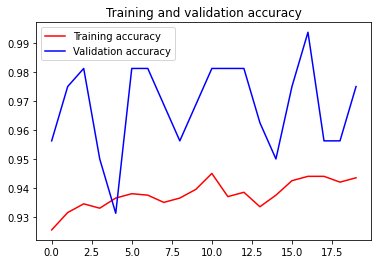

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()